In [17]:
# ==========================================
# Crime Data Analysis – Final Coursework 
# ==========================================

# ==============================
# 1️ Import Libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# For inline plotting
%matplotlib inline

# ==============================
# 2️ Load Dataset
# ==============================
df = pd.read_csv('Crime_Dataset_Coursework1.csv', parse_dates=['Dispatch Date / Time'])

# ===========================
# 3️ Basic Info & Cleaning
# ===========================
df.info()
df.describe(include='all')
df.isnull().sum()
df.duplicated().sum()

C:\Users\Bilani.d\AppData\Local\Temp\ipykernel_4584\2340868429.py:20: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Crime_Dataset_Coursework1.csv', parse_dates=['Dispatch Date / Time'])
C:\Users\Bilani.d\AppData\Local\Temp\ipykernel_4584\2340868429.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Crime_Dataset_Coursework1.csv', parse_dates=['Dispatch Date / Time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Incident ID             306094 non-null  int64         
 1   Offence Code            306094 non-null  object        
 2   CR Number               306094 non-null  int64         
 3   Dispatch Date / Time    257065 non-null  datetime64[ns]
 4   NIBRS Code              306094 non-null  object        
 5   Victims                 306094 non-null  int64         
 6   Crime Name1             305822 non-null  object        
 7   Crime Name2             305822 non-null  object        
 8   Crime Name3             305822 non-null  object        
 9   Police District Name    306000 non-null  object        
 10  Block Address           279888 non-null  object        
 11  City                    304818 non-null  object        
 12  State                   306094

np.int64(0)

In [19]:

# Basic null checks and quick cleaning
print("\nMissing values (top columns):")
print(df.isnull().sum().sort_values(ascending=False).head(20))


Missing values (top columns):
Street Suffix           300662
Street Prefix           292463
End_Date_Time           161658
Dispatch Date / Time     49029
Block Address            26206
Address Number           26109
Zip Code                  3179
Beat                      1530
Sector                    1530
City                      1276
Street Type                339
Crime Name3                272
Crime Name1                272
Crime Name2                272
PRA                        239
Police District Name        94
Street Name                  1
CR Number                    0
Offence Code                 0
Victims                      0
dtype: int64


In [21]:

# Safety / convenience columns
df['Year'] = df['Dispatch Date / Time'].dt.year
df['Month'] = df['Dispatch Date / Time'].dt.month
df['Hour'] = df['Dispatch Date / Time'].dt.hour
df['DayOfWeek'] = df['Dispatch Date / Time'].dt.day_name()
df['PrimaryCrime'] = df['Crime Name1']

# Fill missing values
fill_cols = ['Police District Name', 'City', 'Place', 'Street Name', 'Agency', 'NIBRS Code']
for col in fill_cols:
    df[col] = df[col].fillna('Unknown')

RQ1: How has crime changed over time across different crime types and police districts?


<Figure size 1200x600 with 0 Axes>

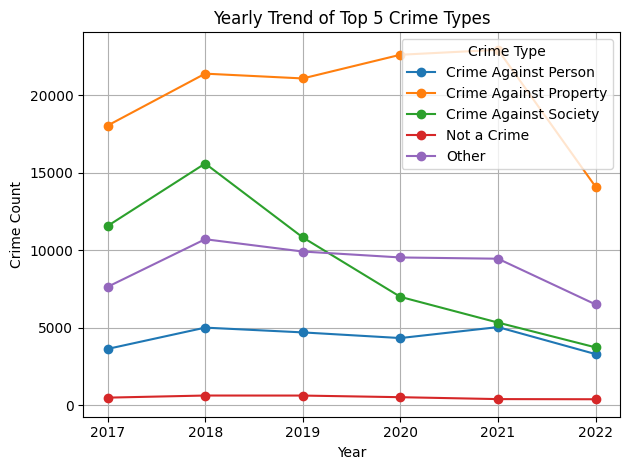

<Figure size 1200x600 with 0 Axes>

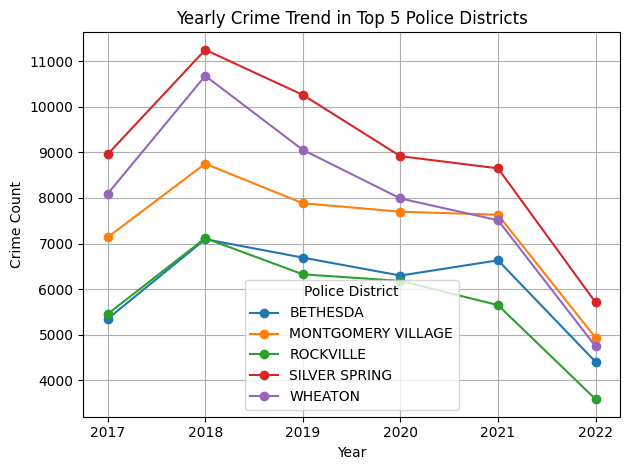

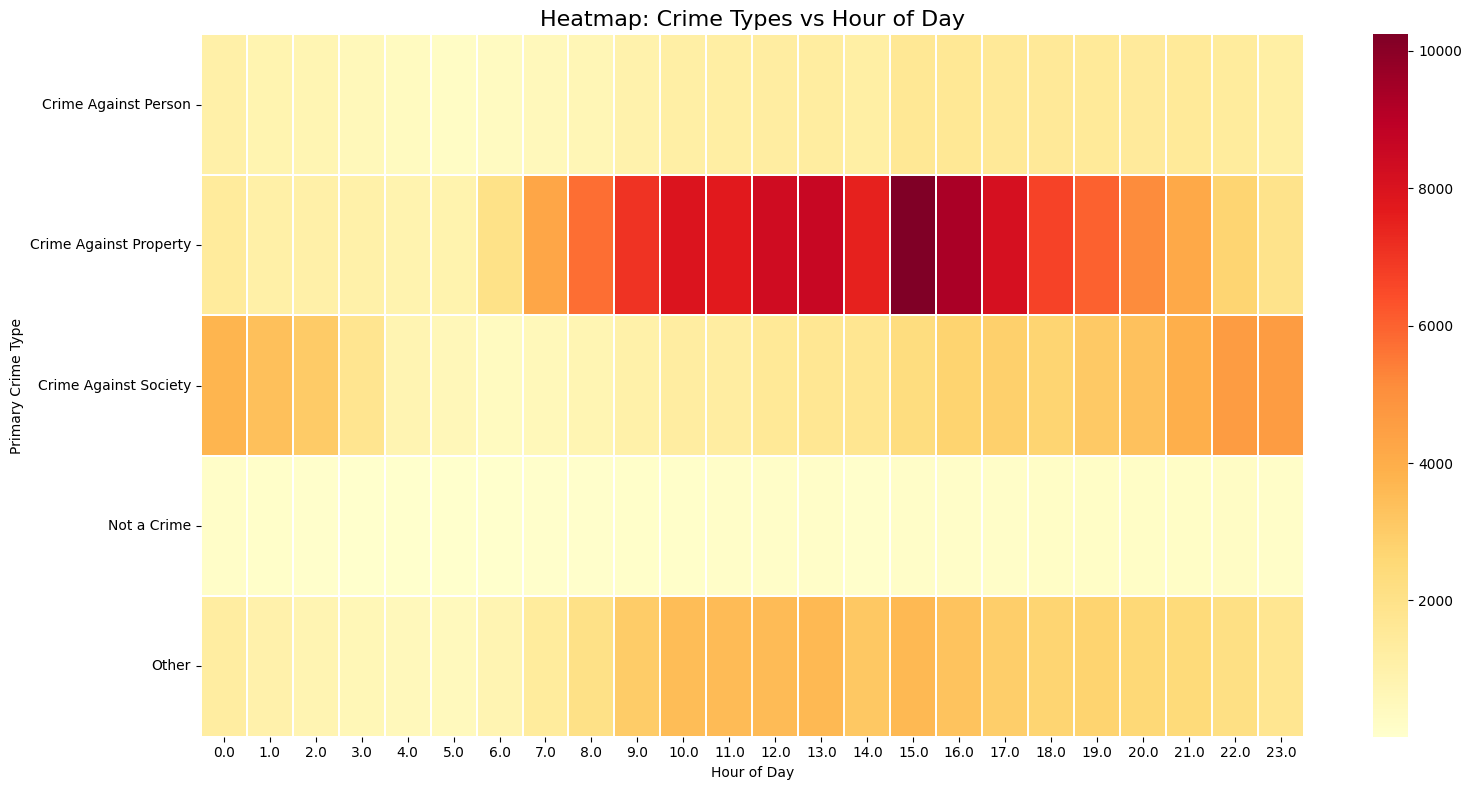

C:\Users\Bilani.d\AppData\Local\Temp\ipykernel_4584\2746721803.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')


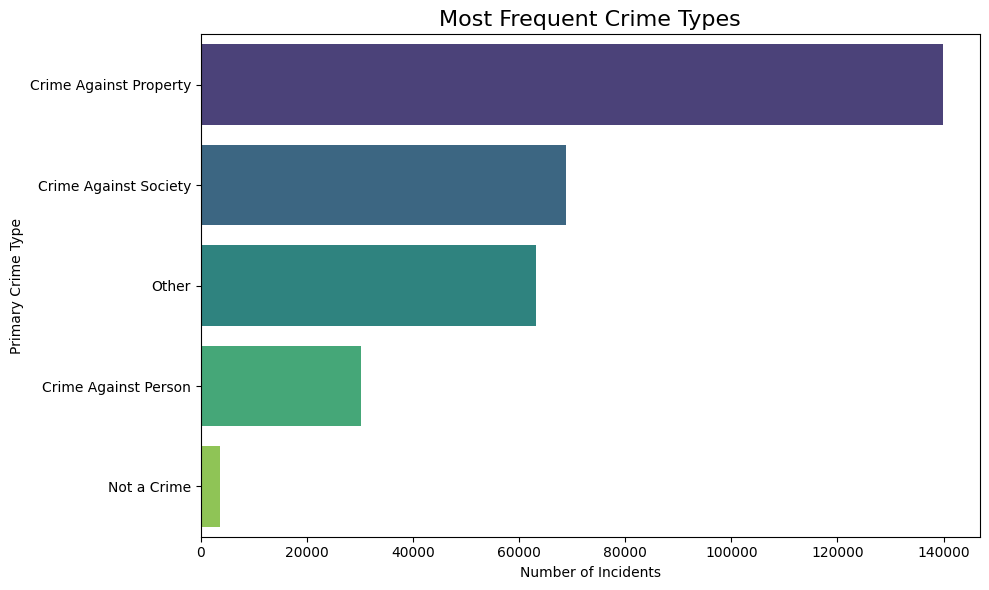

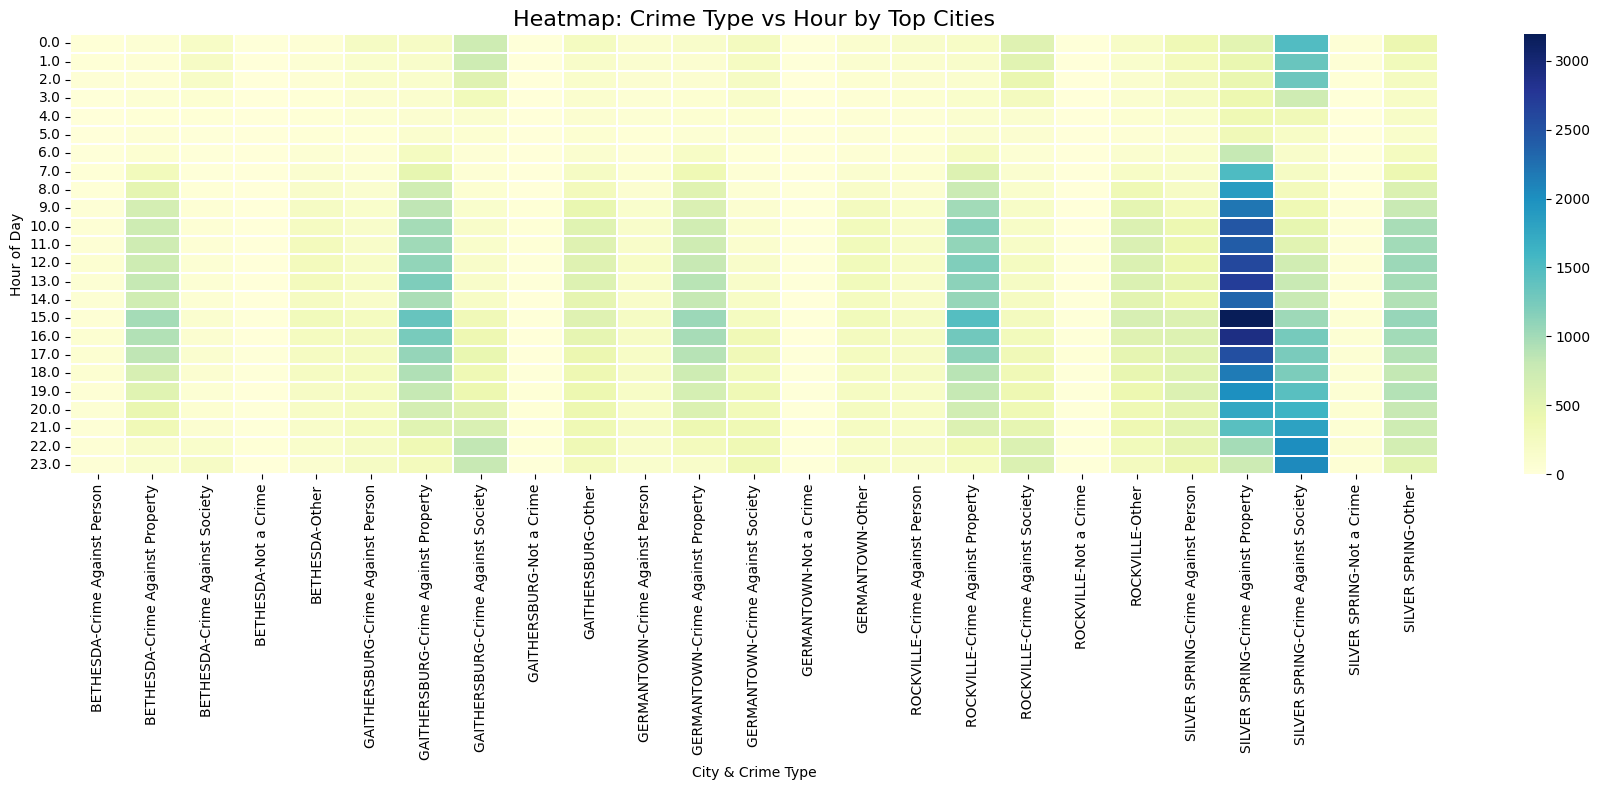

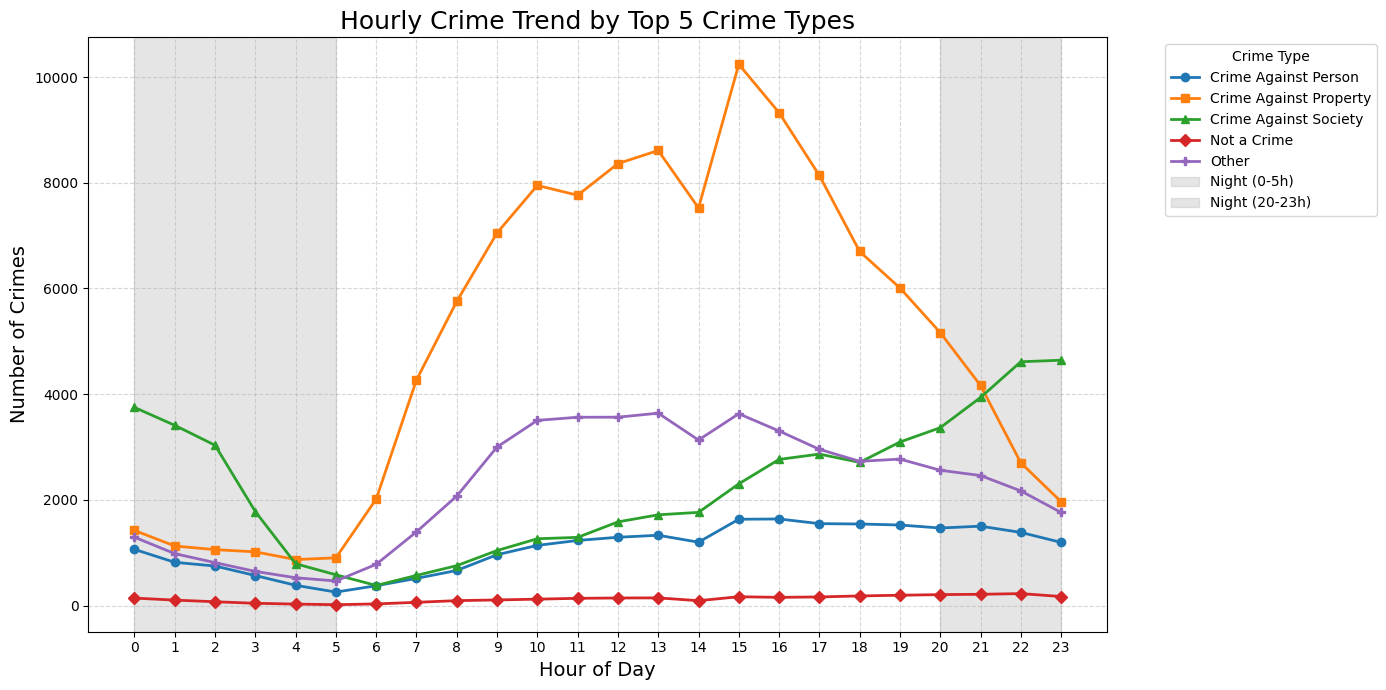

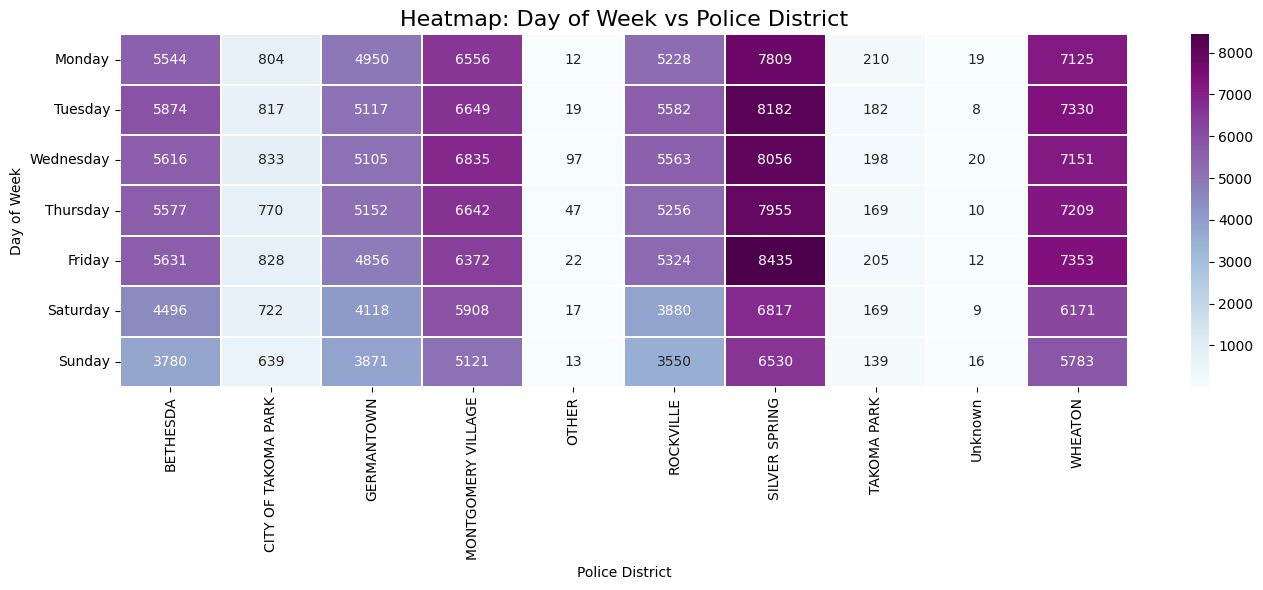

In [22]:
# ==============================
# RQ1: Crime Trend Over Time
# ==============================
print("RQ1: How has crime changed over time across different crime types and police districts?")

rq1_df = df[['Year', 'PrimaryCrime', 'Police District Name', 'Incident ID']].dropna()

# Top 5 Crime Types Over Time
top5_crimes = rq1_df['PrimaryCrime'].value_counts().head(5).index
top5_df = rq1_df[rq1_df['PrimaryCrime'].isin(top5_crimes)]

plt.figure(figsize=(12,6))
top5_df.groupby(['Year','PrimaryCrime'])['Incident ID'].count().unstack().plot(marker='o')
plt.title("Yearly Trend of Top 5 Crime Types")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend(title="Crime Type")
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 5 Police Districts Over Time
top5_dist = rq1_df['Police District Name'].value_counts().head(5).index
top5_dist_df = rq1_df[rq1_df['Police District Name'].isin(top5_dist)]

plt.figure(figsize=(12,6))
top5_dist_df.groupby(['Year','Police District Name'])['Incident ID'].count().unstack().plot(marker='o')
plt.title("Yearly Crime Trend in Top 5 Police Districts")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend(title="Police District")
plt.grid(True)
plt.tight_layout()
plt.show()


# ==============================
# RQ2: Crime Types vs Time of Day & Location
# ==============================
# Heatmap: Crime Type vs Hour
plt.figure(figsize=(16,8))
pivot_rq2_1 = pd.crosstab(df['PrimaryCrime'], df['Hour'])
sns.heatmap(pivot_rq2_1, cmap='YlOrRd', linewidths=0.2)
plt.title("Heatmap: Crime Types vs Hour of Day", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Primary Crime Type")
plt.tight_layout()
plt.show()

# Top 10 Crime Types
top_crimes = df['PrimaryCrime'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
plt.title("Most Frequent Crime Types", fontsize=16)
plt.xlabel("Number of Incidents")
plt.ylabel("Primary Crime Type")
plt.tight_layout()
plt.show()

# Extra Heatmap: Crime Type vs Hour by Top Cities
top_cities = df['City'].value_counts().head(5).index
df_top = df[df['City'].isin(top_cities)]
top_crimes8 = df['PrimaryCrime'].value_counts().head(8).index
df_top = df_top[df_top['PrimaryCrime'].isin(top_crimes8)]

pivot_rq2_extra = df_top.pivot_table(
    index='Hour',
    columns=['City', 'PrimaryCrime'],
    values='Incident ID',
    aggfunc='count',
    fill_value=0
)
plt.figure(figsize=(18,8))
sns.heatmap(pivot_rq2_extra, cmap='YlGnBu', linewidths=0.2)
plt.title("Heatmap: Crime Type vs Hour by Top Cities", fontsize=16)
plt.xlabel("City & Crime Type")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


# ==============================
# RQ3: Crime Timing vs Crime Type & District
# ==============================
# Line Plot: Hourly Crime Trend by Top 5 Crime Types
top5_crimes = df['PrimaryCrime'].value_counts().head(5).index
df_top = df[df['PrimaryCrime'].isin(top5_crimes)]
hourly_trend = df_top.groupby(['Hour', 'PrimaryCrime']).size().unstack()

plt.figure(figsize=(14,7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
markers = ['o','s','^','D','P']
for idx, crime in enumerate(hourly_trend.columns):
    plt.plot(hourly_trend.index, hourly_trend[crime], marker=markers[idx], color=colors[idx], linewidth=2, label=crime)
plt.axvspan(0, 5, color='gray', alpha=0.2, label='Night (0-5h)')
plt.axvspan(20, 23, color='gray', alpha=0.2, label='Night (20-23h)')
plt.title("Hourly Crime Trend by Top 5 Crime Types", fontsize=18)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Heatmap: DayOfWeek vs Police District
top_districts = df['Police District Name'].value_counts().head(10).index
df_top = df[df['Police District Name'].isin(top_districts)]
pivot_rq3_2 = pd.crosstab(df_top['DayOfWeek'], df_top['Police District Name'])
pivot_rq3_2 = pivot_rq3_2.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(14,6))
sns.heatmap(pivot_rq3_2, cmap='BuPu', linewidths=0.2, annot=True, fmt='d')
plt.title("Heatmap: Day of Week vs Police District", fontsize=16)
plt.xlabel("Police District")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

RQ2: How has crime changed over time across different crime types and police districts?
H: Drug-related offenses are more likely to occur in vehicles or parking lots, while assaults are more common at residences.


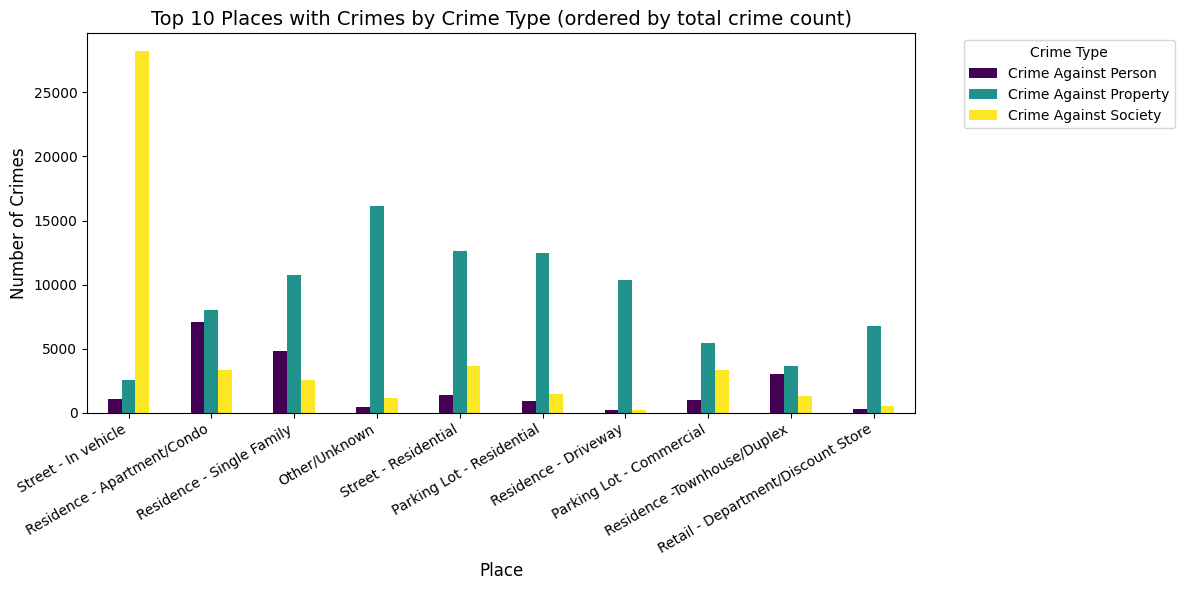

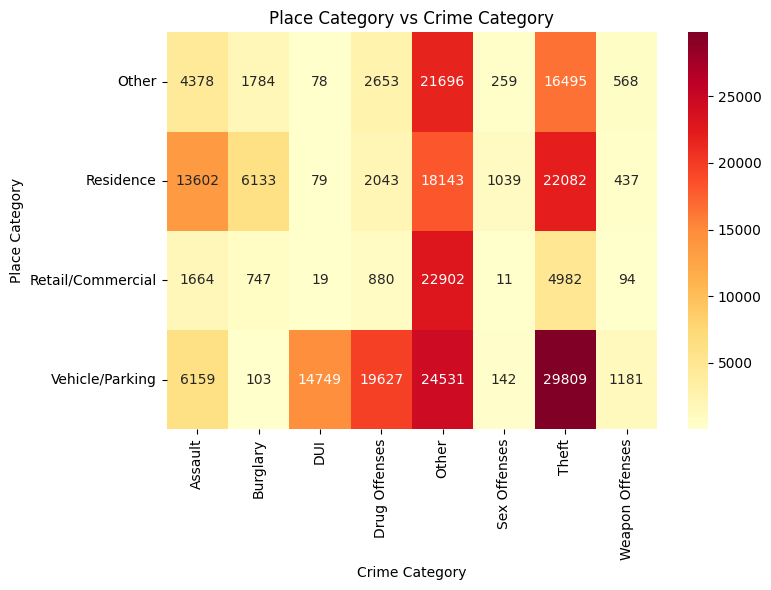

In [24]:
# ==============================
# RQ4: Is there a relationship between the place type and the types of crimes committed?
# ==============================
print("RQ2: How has crime changed over time across different crime types and police districts?")
print("H: Drug-related offenses are more likely to occur in vehicles or parking lots, while assaults are more common at residences.")

dfc = df.copy()

# clean missing values for Place and Crime Name
dfc['Place'] = dfc['Place'].fillna('Unknown')
dfc['Crime Name1'] = dfc['Crime Name1'].fillna('Unknown')

# Remove unclear or non-crime categories
exclude_crimes = ['Unknown', 'Not a Crime', 'Other']
dfc = dfc[~dfc['Crime Name1'].isin(exclude_crimes)]
dfc = dfc[~dfc['Place'].isin(exclude_crimes)]

# Identify top 10 places and top 5 crime types to focus visualization
top_places = dfc['Place'].value_counts().head(10).index
top_crimes = dfc['Crime Name1'].value_counts().head(5).index

# Filter dataset to only top locations and crimes
df_filtered = dfc[dfc['Place'].isin(top_places) & dfc['Crime Name1'].isin(top_crimes)]

stacked_data = df_filtered.pivot_table(
    index='Place',
    columns='Crime Name1',
    aggfunc='size',
    fill_value=0
)

stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data_sorted = stacked_data.sort_values(by='Total', ascending=False)
stacked_data_sorted = stacked_data_sorted.drop(columns='Total')

# Sort locations by total crime count for cleaner visualization

ax = stacked_data_sorted.plot(
    kind='bar',
    figsize=(12, 6),
    colormap='viridis'
)

plt.title("Top 10 Places with Crimes by Crime Type (ordered by total crime count)", fontsize=14)
plt.xlabel("Place", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=30, ha='right')  # ha='right' aligns the labels nicely
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# -----------------------------
# Place and Crime Category Classification
# -----------------------------

# Functions to map place names into simplified categories
def simplify_place(p):
    if not isinstance(p, str) or p.strip() == "":
        return "Other"
    
    s = p.upper()

    # --- Category keyword lists ---
    parking_keywords = ["PARKING LOT", "PARKING GARAGE", "CAR PARK","VEHICLE", "STREET", "ROAD", "HIGHWAY", "SIDEWALK"]
    residence_keywords = ["RESIDENCE", "HOME", "HOUSE", "APARTMENT", "DWELLING"]
    retail_keywords = ["RETAIL", "STORE", "MALL", "MARKET", "SUPERMARKET", "SHOP", "GROCERY"]
    
    # --- Matching logic ---
    if any(k in s for k in parking_keywords):
        return "Vehicle/Parking"

    if any(k in s for k in residence_keywords):
        return "Residence"

    if any(k in s for k in retail_keywords):
        return "Retail/Commercial"

    return "Other"

# Function to classify crimes into broad categories
def categorize_crime(crime):
    if pd.isna(crime):       # handle missing values
        return "Unknown"

    c = str(crime).lower()   # convert to string safely

    if "drug" in c:
        return "Drug Offenses"
    if "assault" in c:
        return "Assault"
    if "rape" in c or "sex" in c:
        return "Sex Offenses"
    if "larceny" in c or "theft" in c:
        return "Theft"
    if "weapon" in c:
        return "Weapon Offenses"
    if "burglary" in c:
        return "Burglary"
    if "dui" in c or "influence" in c:
        return "DUI"
    
    return "Other"

dfc["Place_Category"] = dfc["Place"].apply(simplify_place)
dfc["Crime_Category"] = dfc["Crime Name2"].apply(categorize_crime)

heat_data2 = pd.crosstab(dfc["Place_Category"], dfc["Crime_Category"])

plt.figure(figsize=(8, 6))
sns.heatmap(
    heat_data2,
    annot=True,
    fmt="g",
    cmap="YlOrRd"
)
plt.title("Place Category vs Crime Category")
plt.xlabel("Crime Category")
plt.ylabel("Place Category")
plt.tight_layout()
plt.show()



RQ5: How do burglary incidents differ between residential and nonresidential locations over time of day?
H: Residential burglaries occur more in daytime hours when residents are more likely to be away.


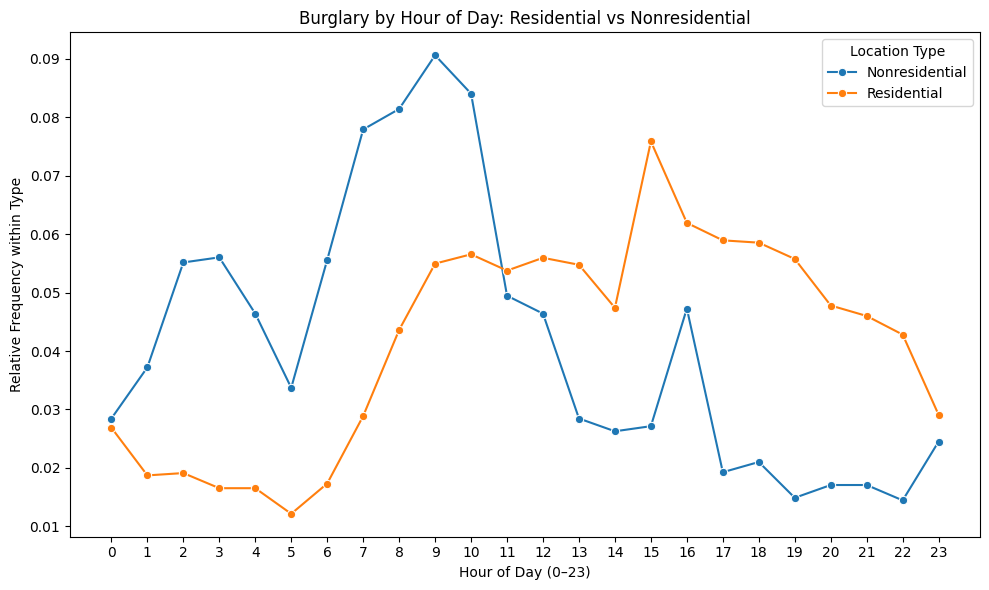

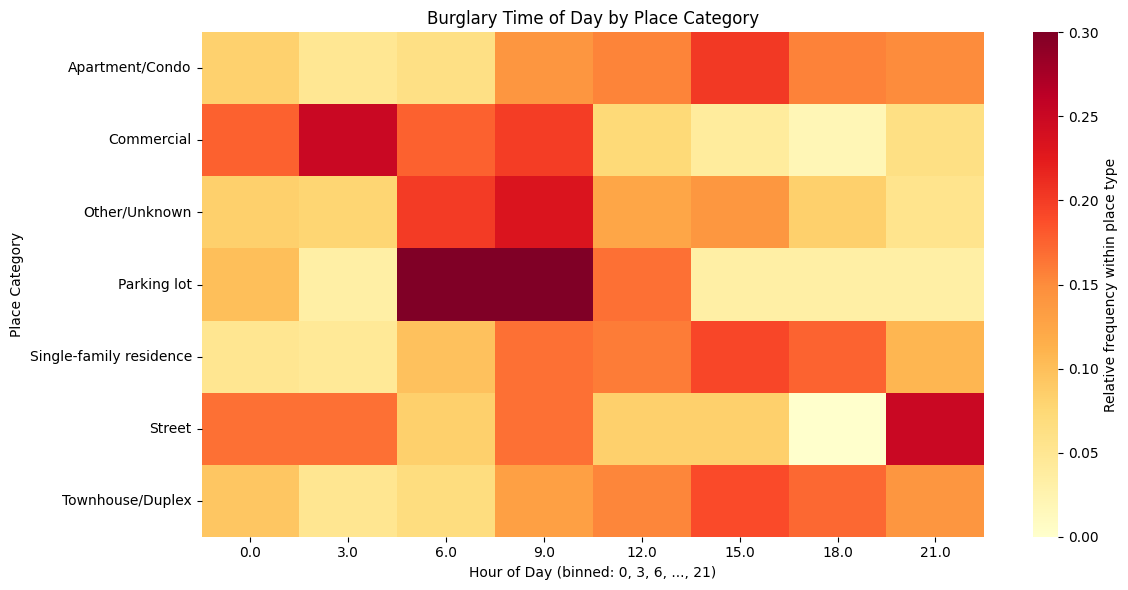

In [23]:
# ==============================
# RQ5: How do burglary incidents differ between residential and nonresidential locations over time of day?
# ==============================

print("RQ5: How do burglary incidents differ between residential and nonresidential locations over time of day?")
print("H: Residential burglaries occur more in daytime hours when residents are more likely to be away.")


burglary = df[df["Crime Name2"] == "Burglary/Breaking and Entering"].copy()

# Identify locations that contain the word "Residence"
# These will be treated as residential burglary sites
residential_places = burglary["Place"][burglary["Place"].str.contains("Residence", na=False)].unique()

# Classify each burglary as Residential or Nonresidential based on the Place field
burglary["LocationType"] = np.where(
    burglary["Place"].isin(residential_places),
    "Residential",
    "Nonresidential"
)

# Count burglaries by location type and hour of day
hour_counts = (
    burglary.groupby(["LocationType", "Hour"])
            .size()
            .reset_index(name="Count")
)

# Compute total burglaries for each location type (for normalizing into percentages)
hour_counts["TotalType"] = hour_counts.groupby("LocationType")["Count"].transform("sum")
hour_counts["Percent"] = hour_counts["Count"] / hour_counts["TotalType"]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=hour_counts,
    x="Hour", y="Percent",
    hue="LocationType",
    marker="o"
)

plt.title("Burglary by Hour of Day: Residential vs Nonresidential")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Relative Frequency within Type")
plt.xticks(range(0, 24))
plt.legend(title="Location Type")
plt.tight_layout()
plt.show()


# Function to classify burglary sites into detailed place categories
def place_category(p):
    if pd.isna(p):
        return "Other/Unknown"
    p = str(p)
    if "Residence - Single Family" in p:
        return "Single-family residence"
    if "Residence - Apartment/Condo" in p:
        return "Apartment/Condo"
    if "Residence -Townhouse/Duplex" in p:
        return "Townhouse/Duplex"
    if "Parking Lot" in p:
        return "Parking lot"
    if "Retail" in p or "Gas Station" in p or "Hotel/Motel" in p:
        return "Commercial"
    if "Street" in p:
        return "Street"
    return "Other/Unknown"

# Apply the place-category function
burglary["PlaceCat"] = burglary["Place"].apply(place_category)

# Bin each hour into 3-hour intervals (0–2, 3–5, 6–8, etc.)
burglary["HourBin"] = (burglary["Hour"] // 3) * 3

pivot = (
    burglary
    .groupby(["PlaceCat", "HourBin"])
    .size()
    .reset_index(name="Count")
    .pivot(index="PlaceCat", columns="HourBin", values="Count")
    .fillna(0)
)
pivot_rel = pivot.div(pivot.sum(axis=1), axis=0)
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_rel,
    annot=False,
    cmap="YlOrRd",
    cbar_kws={"label": "Relative frequency within place type"}
)

plt.title("Burglary Time of Day by Place Category")
plt.xlabel("Hour of Day (binned: 0, 3, 6, ..., 21)")
plt.ylabel("Place Category")
plt.tight_layout()
plt.show()


In [ ]:
# ==============================
# RQ6: 
# ==============================

print("RQ5: How does time of day affect police response time and the likelihood of injuries ormultiple victims, when comparing similar incident types and locations?")
print("H: For the same crime category (for example, Crimes Against Person) and similar place types, incidents that begin at night (22:00–06:00) have a longer average police response time (Dispatch Date/Time − Start_Date_Time) than incidents that begin during the day (06:00–22:00)")

df["Dispatch Date / Time"] = pd.to_datetime(
    df["Dispatch Date / Time"], errors="coerce"
)

# --- Compute police response time (minutes) ---
df["response_time_min"] = (
    (df["Dispatch Date / Time"] - df["Start_Date_Time"])
    .dt.total_seconds() / 60
)

# --- Remove negative and extreme values ---
df = df[(df["response_time_min"] >= 0) &
        (df["response_time_min"] < 600)]  # Keep < 10 hours

# --- Day/Night classification ---
def day_night(dt):
    if pd.isna(dt):
        return "Unknown"
    hour = dt.hour
    return "Night (22–06)" if (hour >= 22 or hour < 6) else "Day (06–22)"

df["TimeOfDay"] = df["Start_Date_Time"].apply(day_night)

# --- Focus on consistent crime type ---
df_filtered = df[df["Crime Name1"] == "Crime Against Person"].copy()

# --------------------------------------------------------
# 2. AGGREGATION
# --------------------------------------------------------

summary = df_filtered.groupby("TimeOfDay").agg(
    avg_response=("response_time_min", "mean"),
    injury_rate=("Victims", lambda x: (x >= 1).mean()),         # at least one injury
    multi_victim_rate=("Victims", lambda x: (x > 1).mean())     # more than one victim
)

# Ensure ordering
summary = summary.loc[["Day (06–22)", "Night (22–06)"]]


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ["#4c72b0", "#dd8452"]


# Subplot 1: Response Time
axes[0].bar(summary.index, summary["avg_response"], color=colors)
axes[0].set_title("Average Police Response Time")
axes[0].set_ylabel("Minutes")
axes[0].set_xlabel("Time of Day")

# Subplot 2: Injury Likelihood
axes[1].bar(summary.index, summary["injury_rate"] * 100, color=colors)
axes[1].set_title("Injury Likelihood (%)")
axes[1].set_ylabel("Percent")
axes[1].set_xlabel("Time of Day")

# Subplot 3: Multiple Victims
axes[2].bar(summary.index, summary["multi_victim_rate"] * 100, color=colors)
axes[2].set_title("Multiple Victims (%)")
axes[2].set_ylabel("Percent")
axes[2].set_xlabel("Time of Day")

for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=0)

fig.suptitle("Day vs. Night Differences in Police Response", fontsize=16, y=1.02)


plt.tight_layout()
plt.savefig("Q6_subplots.png")
plt.show()

##------------------------------------

sns.set(style="whitegrid")

sub = df[df["Crime Name1"] == "Crime Against Person"].copy()

sub["Place_simple"] = sub["Place"].fillna("Other")

top_places = sub["Place_simple"].value_counts().head(6).index
sub = sub[sub["Place_simple"].isin(top_places)]

g = sns.catplot(
    data=sub,
    x="TimeOfDay",
    y="response_time_min",
    col="Place_simple",
    kind="box",
    palette=["#4C72B0", "#DD8452"],
    col_wrap=3,
    height=4,
    sharey=True
)

g.set_titles("{col_name}")
g.set_axis_labels("Time of Day", "Response Time (minutes)")
plt.suptitle(
    "Police Response Time by Time of Day Across Place Types\nCrimes Against Person",
    y=1.05,
    fontsize=14
)

plt.tight_layout()
plt.savefig("Q6_catplot.png")
plt.show()